# Microsoft Insights #

## Objective: ##
Microsoft has tasked us with figuring out what types of films are currently doing the best at the box office.

A database has been provided under as `movies.db`. We will use this dataset to make insights and visualizations that can help its shareholders make educated decisions about the type of movies that they are going to pursue.

We will start by importing all the necessary libraries to explore our dataset and visualize it:

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## Exploring the Data

Transform the database into an easy to read `DataFrame` using the Pandas library.

Explore the data in the table `rotten_tomatoes_movies`.

In [2]:
conn = sqlite3.connect('data/movies.db')
cur = conn.cursor()
cur.execute("""SELECT * FROM rotten_tomatoes_movies""")

rottenTomatoesMovies = pd.DataFrame(cur.fetchall())
rottenTomatoesMovies.columns = [x[0] for x in cur.description]
rottenTomatoesMovies.head()

,idx,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [3]:
rottenTomatoesMovies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   idx                               17712 non-null  int64  
 1   rotten_tomatoes_link              17712 non-null  object 
 2   movie_title                       17712 non-null  object 
 3   movie_info                        17391 non-null  object 
 4   critics_consensus                 9134 non-null   object 
 5   content_rating                    17712 non-null  object 
 6   genres                            17693 non-null  object 
 7   directors                         17518 non-null  object 
 8   authors                           16170 non-null  object 
 9   actors                            17360 non-null  object 
 10  original_release_date             16546 non-null  object 
 11  streaming_release_date            17328 non-null  object 
 12  runt

Explore the data in `bom_movie_gross`.

In [4]:
cur.execute("""SELECT * FROM bom_movie_gross""")

df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df.head()

,idx,title,studio,domestic_gross,foreign_gross,year
0,0,Toy Story 3,BV,415000000.0,652000000,2010
1,1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,3,Inception,WB,292600000.0,535700000,2010
4,4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   idx             3387 non-null   int64  
 1   title           3387 non-null   object 
 2   studio          3382 non-null   object 
 3   domestic_gross  3359 non-null   float64
 4   foreign_gross   2037 non-null   object 
 5   year            3387 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 158.9+ KB


## What production company produced the most movies in the decade? ## 

Select the name of the `Production Company` and the ` Count of Movies` from the table `rotten_tomatoes_movies` and ordering in descending order to view which `Production Comapny` takes on the most movie projects.

In [6]:
cur.execute("""SELECT production_company, count(movie_title) AS sum_of_movies,
               avg(domestic_gross) AS average_gross, avg(domestic_gross)/count(movie_title) AS per_movie_gross
               FROM rotten_tomatoes_movies
               JOIN bom_movie_gross
               ON rotten_tomatoes_movies.movie_title = bom_movie_gross.title
               WHERE year >= 2010
               GROUP BY production_company
               HAVING COUNT(movie_title) >= 3
               ORDER BY per_movie_gross DESC""")

df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.head()

,production_company,sum_of_movies,average_gross,per_movie_gross
0,Disney/Pixar,4,324475000.000,81118750.000
1,MGM,3,156800000.000,52266666.667
2,Paramount,4,144275000.000,36068750.000
3,DreamWorks Animation,4,138800000.000,34700000.000
4,Twentieth Century Fox,3,69733333.333,23244444.444


It's time to visualize the above data in the DataFrame. To make it more presentable, a color scheme has been chosen to make it more visually appealing.

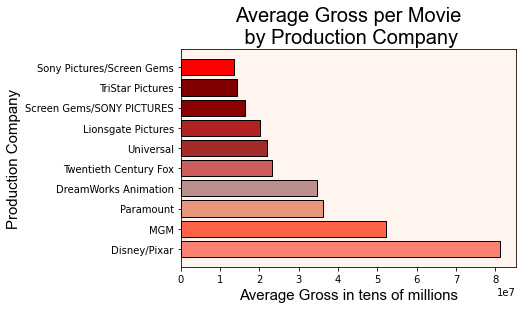

In [8]:
red_color_palette = ['salmon','tomato','darksalmon','rosybrown',
                     'indianred','brown','firebrick','darkred','maroon','red']

plt.barh(df.production_company[:10], df['per_movie_gross'][:10], edgecolor = 'black', color = red_color_palette)

plt.title('Average Gross per Movie\n by Production Company', fontname='arial', size=20)
plt.xlabel('Average Gross in tens of millions', size=15, fontname='arial')
plt.ylabel('Production Company', size=15, fontname ='arial')
plt.rcParams['axes.facecolor'] = 'seashell'
plt.show()

# What studio generated the most gross? #

The code below shows the total gross revenue domestically that each studio has generated in total starting from the year 2010 forward.

Note that the `pd.set_option('display.float_format', lambda x: '%.3f' % x)` is used to remove the scientific notation that pandas would normally format the large numbers by.

In [9]:
cur.execute("""SELECT studio, sum(domestic_gross) AS SUM, avg(domestic_gross) AS AVERAGE FROM bom_movie_gross
               JOIN rotten_tomatoes_movies
               ON bom_movie_gross.title = rotten_tomatoes_movies.movie_title
               WHERE year >= 2010
               GROUP BY studio
               ORDER BY SUM DESC
               LIMIT 10;""")

df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.head()

,studio,SUM,AVERAGE
0,BV,15534080700.00,189440008.54
1,Uni.,12097022000.00,90276283.58
2,WB,9871000000.00,91398148.15
3,Fox,9429699998.00,83448672.55
4,Sony,7065690998.00,87230753.06


Now lets plot it in a bargraph to better compare the numbers earned in average and in total for each studio. Passing `plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)` allows the passing of the large numbers.

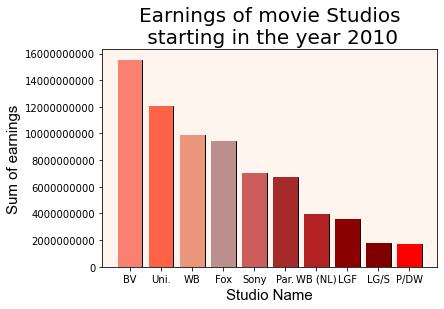

In [10]:
plt.bar(df.studio, df['SUM'], edgecolor = 'black')

y_pos = np.arange(len(df.studio))
height = df['SUM']
plt.xlabel('Studio Name', size=15, fontname = "arial")
plt.ylabel('Sum of earnings', size = 15, fontname = 'arial')
plt.title('Earnings of movie Studios\n starting in the year 2010', size=20)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.bar(y_pos, height, color= red_color_palette)
plt.show()

# Find the directors that averaged the most gross #

Use the table `rotten_tomatoes_movies` and `bom_movie_gross` and assgined to DataFrame **df_director**, apply some data cleaning and select the directors that averaged the most gross domestically.

In [11]:
cur.execute("""SELECT directors, count(directors) AS total_movies, 
               avg(domestic_gross) AS average_gross_by_director, genres, max(tomatometer_rating) AS max_rating
               FROM rotten_tomatoes_movies
               JOIN bom_movie_gross
               ON rotten_tomatoes_movies.movie_title = bom_movie_gross.title
               WHERE year >= 2010
               GROUP BY directors
               ORDER BY average_gross_by_director DESC""")

df_director = pd.DataFrame(cur.fetchall())
df_director.columns = [x[0] for x in cur.description]

df_director = df_director.dropna()
df_director.head()

,directors,total_movies,average_gross_by_director,genres,max_rating
0,Anthony Russo,2,543450000.00,"Action & Adventure, Science Fiction & Fantasy",91.00
1,"Andrew Stanton, Angus MacLane",1,486300000.00,Animation,94.00
2,Joss Whedon,1,459000000.00,"Action & Adventure, Science Fiction & Fantasy",76.00
3,Lee Unkrich,1,415000000.00,"Animation, Comedy, Kids & Family",98.00
4,Patty Jenkins,1,412600000.00,"Action & Adventure, Drama, Science Fiction & F...",93.00


It is time to visualize it. To keep it in theme, we will use the same color palette.

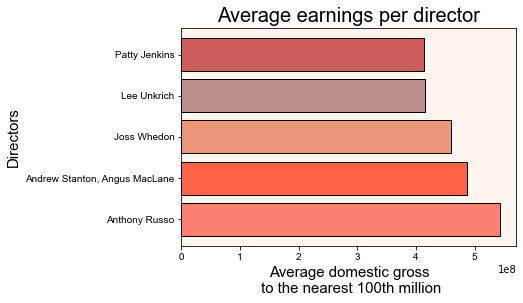

In [12]:
plt.barh(df_director.directors[:5], df_director['average_gross_by_director'][:5], 
         color=red_color_palette, edgecolor='black')

plt.yticks(size = 10, fontname='arial')
plt.xlabel('Average domestic gross\n to the nearest 100th million', size = 15, fontname='arial')
plt.xticks(size = 10, fontname='arial')
plt.ylabel('Directors', size = 15, fontname = 'arial')
plt.title('Average earnings per director', size=20, fontname = 'arial')
plt.show()

Now let's see some correlations between our data. We will use it to see if a certain movie metric has a significant impact in the earnings that the movie gains while in the boxoffice domestically. 
We will do this by defining the function `check_correlation` that will check the correlation coefficient of the gross and a desired metric and will return a statement that indicates if there is a correlation or not.

In [13]:
def check_correlation(x,y):
    correlation = x.corr(y)
    if correlation == 1:
        return 'There is a strong positive correlation'
    elif correlation > .2:
        return 'There is a positive correlation'
    elif correlation <= .2:
        return 'There is a weak positive correlation'
    elif correlation == 0:
        return "There is no correlation"
    else:
        return 'There is a negative correlation'

Now, we will visualize it and use our defined function to check for correlation.

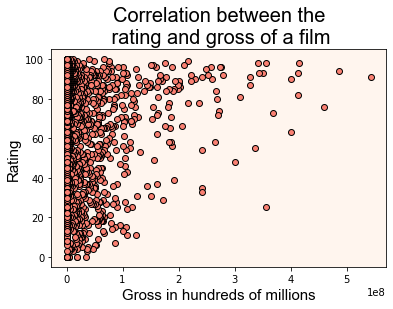

'There is a weak positive correlation'

In [14]:
averageRating = df_director.max_rating
averageGross = df_director.average_gross_by_director

plt.scatter(averageGross,averageRating, edgecolors='black', color = 'salmon')
plt.ylabel('Rating', size=15, fontname ='arial')
plt.xlabel('Gross in hundreds of millions', size=15, fontname='arial')
plt.title('Correlation between the\n rating and gross of a film', size= 20, fontname ='arial')
plt.show()

check_correlation(averageRating, averageGross)

There appears to be a "weak positive correlation". Because the correlation coefficient appears to be so low, it is likely that the rating of a movie does not have a vital role in the gross of a movie.

## Correlation between `Runtime` and `Domestic Gross` ##

Now we want to see the correlation between Runtime and Domestic Gross. For that we will select the `movie_title` data, its `runtime`, and its `domestic_gross`.
Let's create `df_runtime` that houses the data that we are looking for.

In [15]:
cur.execute("""SELECT movie_title, runtime, domestic_gross FROM rotten_tomatoes_movies
               JOIN bom_movie_gross
               ON rotten_tomatoes_movies.movie_title = bom_movie_gross.title
               WHERE year >= 2010
               ORDER BY domestic_gross DESC""")
df_runtime = pd.DataFrame(cur.fetchall())
df_runtime.columns = [x[0] for x in cur.description]
df_runtime.head()

,movie_title,runtime,domestic_gross
0,Black Panther,134.00,700100000.00
1,Avengers: Infinity War,149.00,678800000.00
2,Jurassic World,124.00,652300000.00
3,Marvel's The Avengers,143.00,623400000.00
4,Star Wars: The Last Jedi,152.00,620200000.00


In [16]:
def ret_metrics(x):
    return df_runtime[x][:10].mean(), df_runtime[x][:10].max(), df_runtime[x][:10].median(), df_runtime[x][:10].mean(), df_runtime[x][:10].min()

ret_metrics('runtime')

(136.3, 165.0, 137.5, 136.3, 103.0)

Time to visualize it, keeing it in theme!

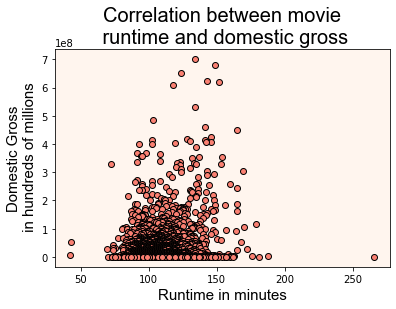

'There is a positive correlation'

In [17]:
runtime = df_runtime['runtime']
grossByRuntime = df_runtime['domestic_gross']

plt.scatter(runtime, grossByRuntime, edgecolor='black', color = 'salmon')
plt.title('Correlation between movie\n runtime and domestic gross', size= 20, fontname='arial')
plt.xlabel('Runtime in minutes', size= 15, fontname='arial')
plt.ylabel('Domestic Gross\n in hundreds of millions', size = 15, fontname = 'arial')
plt.show()
check_correlation(runtime,grossByRuntime)

It appears that there is a positive correlation between Domestic Gross and its Runtime, with the `average` runtime being of 136 minutes, the `minimum` runtime being 103 minutes, and the `max` runtime being of 165 minutes.

## What genre generated the most gross ##

Let's create our DataFrame `df_genres` that calls for the genres and the sum of the domestic gross.

In [18]:
cur.execute("""SELECT genres, sum(domestic_gross) AS total_gross
               FROM rotten_tomatoes_movies
               JOIN bom_movie_gross
               ON rotten_tomatoes_movies.movie_title = bom_movie_gross.title
               WHERE year >= 2010
               GROUP BY genres
               ORDER BY total_gross DESC""")

df_genres = pd.DataFrame(cur.fetchall())
df_genres.columns = [x[0] for x in cur.description]
df_genres.head()

,genres,total_gross
0,"Action & Adventure, Science Fiction & Fantasy",9162286999.00
1,Comedy,7536644198.00
2,"Action & Adventure, Drama, Science Fiction & F...",6356199999.00
3,Drama,5799617297.00
4,"Animation, Comedy, Kids & Family",3513100000.00


Now let's visualize and compare.

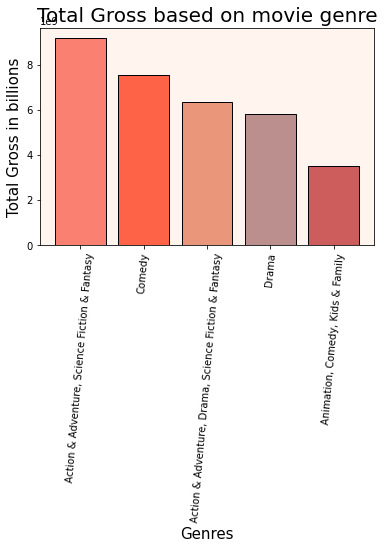

In [19]:
plt.bar(df_genres['genres'][:5], df_genres['total_gross'][:5], color = red_color_palette, edgecolor='black')
plt.title('Total Gross based on movie genre', size = 20)
plt.xticks(rotation = 85, size = 10)
plt.yticks(size = 10)
plt.xlabel('Genres', size = 15)
plt.ylabel('Total Gross in billions', size=15)
plt.show()